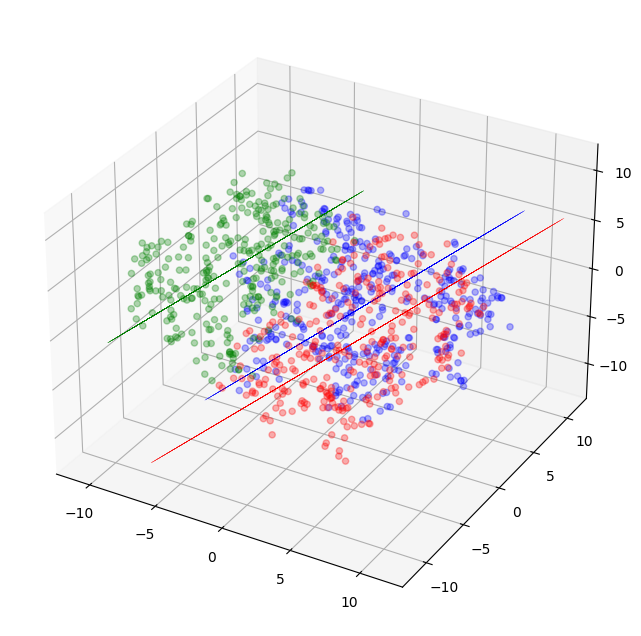

In [12]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
from tqdm import tqdm

def make_ellipsoid(center, radii, eigenvectors):
    # create 3x3 rotation matrix from eigenvectors
    rotation_matrix = eigenvectors.T
    # create sphere with radii and center
    u = np.linspace(0.0, 2.0 * np.pi, 100)
    v = np.linspace(0.0, np.pi, 100)
    x = radii[0] * np.outer(np.cos(u), np.sin(v))
    y = radii[1] * np.outer(np.sin(u), np.sin(v))
    z = radii[2] * np.outer(np.ones_like(u), np.cos(v))
    # apply rotation matrix and center shift
    for i in range(len(x)):
        for j in range(len(x)):
            [x[i,j],y[i,j],z[i,j]] = np.dot(rotation_matrix,[x[i,j],y[i,j],z[i,j]])+center
    # create polygon for surface
    verts = []
    for i in range(len(x)):
        verts.append(list(zip(x[i], y[i], z[i])))
    # create 3D polygon collection
    poly = Poly3DCollection(verts, linewidth=0.1, alpha=0.5)
    return poly

# Generate random 5D data with 1000 points and normalize it
data = np.random.randn(1000, 5)
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Apply TSNE to reduce the dimensionality of the data to 3D
tsne = TSNE(n_components=3, random_state=42)
data_tsne = tsne.fit_transform(data)

# Apply KMEANS++ to cluster the 3D data into three clusters
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(data_tsne)

# Create the 3D plot
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')
colors = ['r', 'g', 'b']

# Plot the points
for i in range(3):
    ax.scatter(data_tsne[labels==i, 0], data_tsne[labels==i, 1], data_tsne[labels==i, 2], c=colors[i], alpha=0.3)

# Compute
centers = kmeans.cluster_centers_
radii = np.zeros((3, 3))
for i in range(3):
    cluster_points = data_tsne[labels == i]
    cluster_center = centers[i]
    diff = cluster_points - cluster_center
    cov = np.cov(diff.T)
    u, s, v = np.linalg.svd(cov)
    radii[i] = 2 * np.sqrt(s)
for i in range(3):
    eigenvectors = v[i]
    center = centers[i]
    radii_ = radii[i]
    ellipsoid = make_ellipsoid(center, radii_, eigenvectors)
    ellipsoid.set_color(colors[i])
    ellipsoid.set_alpha(0.1)
    ax.add_collection3d(ellipsoid)

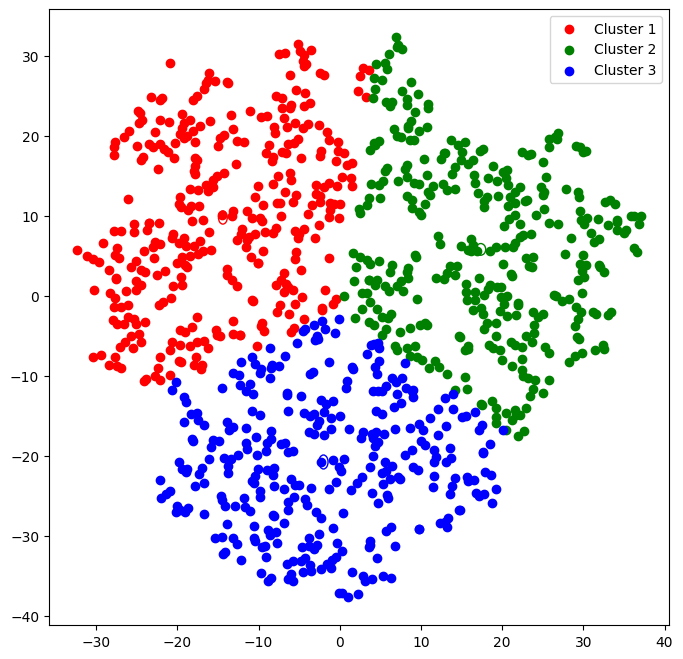

In [18]:
import numpy as np
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

# Generate random 5D data with 1000 points and normalize it
data = np.random.randn(1000, 5)
data = (data - np.mean(data, axis=0)) / np.std(data, axis=0)

# Apply TSNE to reduce the dimensionality of the data to 2D
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Apply KMEANS++ to cluster the 2D data into three clusters
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
labels = kmeans.fit_predict(data_tsne)

# Create the plot
fig, ax = plt.subplots(figsize=(8, 8))

# Plot the points
for i in range(3):
    ax.scatter(data_tsne[labels==i, 0], data_tsne[labels==i, 1], c=['r', 'g', 'b'][i], label=f'Cluster {i+1}')
colors = ['red','green','blue']
# Plot the ellipses
for i in range(3):
    cluster_data = data[labels == i]
    cov = np.cov(cluster_data, rowvar=False)
    eigvals, eigvecs = np.linalg.eigh(cov)
    eigvals = np.sqrt(eigvals)
    ell = Ellipse(xy=kmeans.cluster_centers_[i, :2], width=eigvals[0] * 2, height=eigvals[1] * 2)
    ell.fill = False 
    ell.set_ec(colors[i])
    # ell.set_facecolor('none')
    # ell.set_edgecolor(['r', 'g', 'b'][i])
    ax.add_patch(ell)

# Set the legend and show the plot
ax.legend()
plt.show()


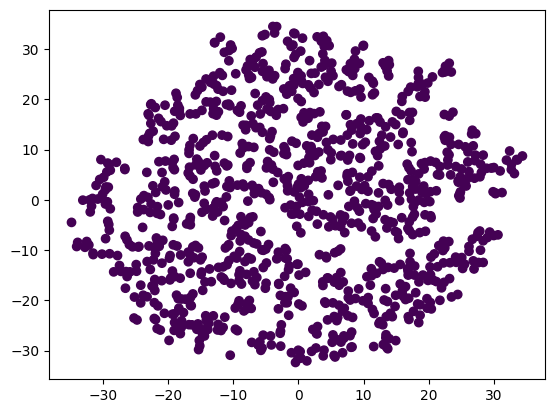

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.patches import Ellipse

# Generate random 5D data
num_points = 1000
data = np.random.normal(loc=0, scale=1, size=(num_points, 5))

# Generate random labels for the data
num_clusters = 5
labels = np.random.randint(0, num_clusters, size=num_points)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Get unique labels
unique_labels = np.unique(labels)

# Plot each cluster with ellipse
for label in unique_labels:
    # Filter data points belonging to current label
    filtered_data = data_tsne[labels == label]

    # Compute center and covariance matrix
    center = np.mean(filtered_data, axis=0)
    cov = np.cov(filtered_data, rowvar=False)

    # Generate ellipse and plot it with data points
    ellipse = Ellipse(xy=center, width=cov[0][0], height=cov[1][1], edgecolor='red', lw=2, facecolor='none')
    plt.scatter(filtered_data[:,0], filtered_data[:,1], c=labels[labels == label])
    plt.gca().add_artist(ellipse)

plt.show()


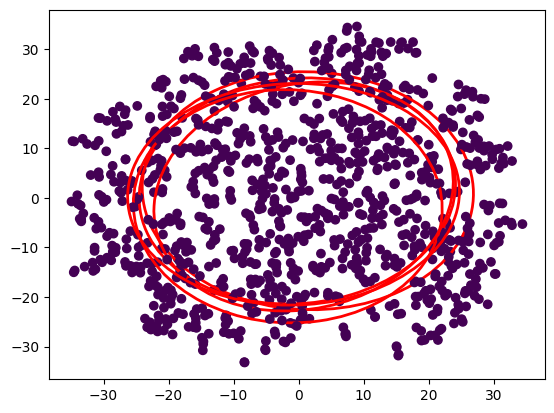

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from matplotlib.patches import Ellipse

# Generate random 5D data
num_points = 1000
data = np.random.normal(loc=0, scale=1, size=(num_points, 5))

# Generate random labels for the data
num_clusters = 5
labels = np.random.randint(0, num_clusters, size=num_points)

# Apply t-SNE to reduce dimensionality to 2D
tsne = TSNE(n_components=2, random_state=42)
data_tsne = tsne.fit_transform(data)

# Get unique labels
unique_labels = np.unique(labels)

# Plot each cluster with ellipse
for label in unique_labels:
    # Filter data points belonging to current label
    filtered_data = data_tsne[labels == label]

    # Compute center and covariance matrix
    center = np.mean(filtered_data, axis=0)
    cov = np.cov(filtered_data, rowvar=False)

    # Compute eigenvalues and eigenvectors of covariance matrix
    eigenvalues, eigenvectors = np.linalg.eigh(cov)

    # Sort eigenvalues and eigenvectors in decreasing order of eigenvalues
    order = eigenvalues.argsort()[::-1]
    eigenvalues = eigenvalues[order]
    eigenvectors = eigenvectors[:,order]

    # Compute angle of rotation and width/height of ellipse
    angle = np.degrees(np.arctan2(*eigenvectors[:,0][::-1]))
    width, height = 2 * np.sqrt(2) * np.sqrt(eigenvalues)

    # Generate ellipse and plot it with data points
    ellipse = Ellipse(xy=center, width=width, height=height, angle=angle, edgecolor='red', lw=2, facecolor='none')
    plt.scatter(filtered_data[:,0], filtered_data[:,1], c=labels[labels == label])
    plt.gca().add_artist(ellipse)

plt.show()
